### Let's Start by implementing Linear Regression from scratch


We'll be using the Housing Prices data set available [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


<b>Acknowledgments.</b>

This post is heavily inspired from an excellent Kaggle Kernel from Rob Harrand's Kernel that can be seen [here](https://www.kaggle.com/tentotheminus9/linear-regression-from-scratch-gradient-descent)

And from David Frossard's blog post regarding Linear Regression with Numpy which can be seen [here](https://www.cs.toronto.edu/~frossard/post/linear_regression/)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

In [28]:
df = pd.read_csv('housing_data_train.csv')

In [29]:
# Let's work with 1 feature -  sqfeet area

x = df['GrLivArea']
y = df['SalePrice']

# Let's normalize the x feature

x = (x-x.mean())/x.std()

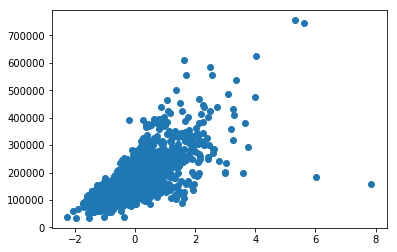

In [30]:
plt.scatter(x,y)

In [31]:
 # Now to somplify our model, so that we don't have to consider the bias (more on this later) in the model.
    # we will add a column of ones to the data.

data_x = np.c_[np.ones(x.shape[0]), x] 


In [32]:
# Grad Descent constants

alpha = 0.01 # learning rate
iterations = 2000 # number of itrations
m = y.size # number of observations.. (i)
#setting some seed for randomisation
np.random.seed(123)
theta = np.random.rand(2) #  initial  random value of theta

In [33]:
# grad descent function

def gradient_descent(x,y,theta,iterations, alpha):
    past_costs = [] #storing all cost values 
    past_thetas = [theta]
    for i in range(iterations):
        pred = np.dot(x,theta)
        error = pred - y
        cost = (1/2*m)*(np.dot(error.T,error))
        past_costs.append(cost)
        theta = theta - (alpha * (1/m)*(np.dot(x.T,error)))
        past_thetas.append(theta)
    return past_thetas, past_costs

In [34]:
#let's run this now
past_thetas,past_costs = gradient_descent(data_x,y,theta,iterations,alpha)
theta = past_thetas[-1]
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 180921.20, 56294.90


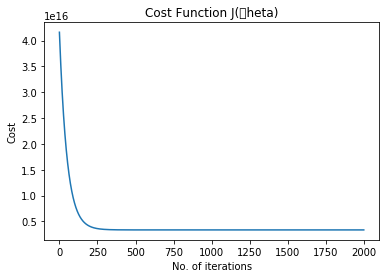

In [35]:
#Plot the cost function...
plt.title('Cost Function J(\theta)')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

ValueError: Can only tuple-index with a MultiIndex

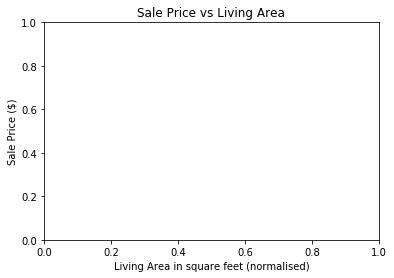

In [36]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)



In [37]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

FileNotFoundError: [Errno 2] No such file or directory: 'animation.gif'